# Click "Edit App" to see the code
# Is Calc A better than Calc B ?
Python code to analyse the data provided in the writing workshop

In [1]:
# python packages
import pandas as pd # Dataframes and reading CSV files
import numpy as np # Numerical libraries
import matplotlib.pyplot as plt # Plotting library
from lmfit import Model # Least squares fitting library

Defining the parameters for the final figure, and a function for the tick marks.

In [8]:
# Define the figure's parameters
fontsize=28
figureParameters = {'figure.figsize' : (12,8),
                    'legend.fontsize': fontsize*0.7,
                    'axes.labelsize' : fontsize,
                    'axes.titlesize' : fontsize,
                    'xtick.labelsize': fontsize*0.8,
                    'ytick.labelsize': fontsize*0.8,
                    'xtick.direction': "in", # tick marks inside the frame
                    'ytick.direction': "in", # tick marks inside the frame
                    'axes.linewidth' : 3,
                    'axes.titlepad'  : 25}

from matplotlib.ticker import (MultipleLocator, 
                               FormatStrFormatter, 
                               AutoMinorLocator)
def prettyTicks(ax,xspacing,yspacing):
    # Add tick marks on all sides of the figure
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')

    # Define the spacing of the major tick marks
    # It is useful to call this function with 0
    # for both ticks' spacing to see what the best
    # range looks like
    # number of tick marks
    if (xspacing > 0):
        ax.xaxis.set_major_locator(MultipleLocator(xspacing))
    if (yspacing > 0):
        ax.yaxis.set_major_locator(MultipleLocator(yspacing))
    
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.xaxis.set_minor_locator(AutoMinorLocator())

    ax.tick_params(which='minor', length=6, width=3, color='black')
    ax.tick_params(which='major', length=12, width=3, color='black')

Reading the input data

In [9]:
data = pd.read_csv("writingWorshopData.csv")
data.columns = ("T", "Calc A" , "Calc B", "Exp")
print(data)

     T   Calc A   Calc B      Exp
0  290 -341.821 -340.013 -341.080
1  295 -340.161 -340.012 -340.909
2  300 -339.436 -339.221 -339.436
3  305 -338.157 -336.800 -336.730
4  310 -335.216 -335.338 -335.280
5  315 -334.557 -334.813 -335.109
6  320 -334.372 -333.315 -333.659
7  325 -333.045 -332.895 -332.930
8  330 -331.915 -331.954 -331.759


The experimental and calculated data should be linear with temperature, so let's fit the data, so that we can also plot the fitting line.

In [10]:
def line(x,m,q):
    return m*x + q

fitLine = Model(line)
params = fitLine.make_params(m=1,q=1)

numberOfDataSets = 3
nameOdDataSet = ["Calc A" , "Calc B", "Exp"]

T0 = 280
results = []
for i in range(0,numberOfDataSets):
    results.append(fitLine.fit(data.iloc[:,(i+1)][data["T"]>T0]  , params=params, x=data[data["T"]>T0]["T"]))

for i in range(0,numberOfDataSets):
    print("    Dataset : %s " % (nameOdDataSet[i]))
    for name, par in results[i].params.items():
        print("          %s : value = %8.3f +/- %.3f " % (name, par.value, par.stderr))
    print("Chi squared : %.3f " % results[i].chisqr)
    Rsquared = 1 - results[i].residual.var() / np.var(data[nameOdDataSet[i]])
    print("  R squared : %.3f " % Rsquared)
    print("-------------------------------------------")

    Dataset : Calc A 
          m : value =    0.249 +/- 0.017 
          q : value = -413.710 +/- 5.234 
Chi squared : 2.988 
  R squared : 0.969 
-------------------------------------------
    Dataset : Calc B 
          m : value =    0.225 +/- 0.016 
          q : value = -405.672 +/- 4.870 
Chi squared : 2.587 
  R squared : 0.967 
-------------------------------------------
    Dataset : Exp 
          m : value =    0.248 +/- 0.018 
          q : value = -413.197 +/- 5.477 
Chi squared : 3.272 
  R squared : 0.966 
-------------------------------------------


Let's now make the figure

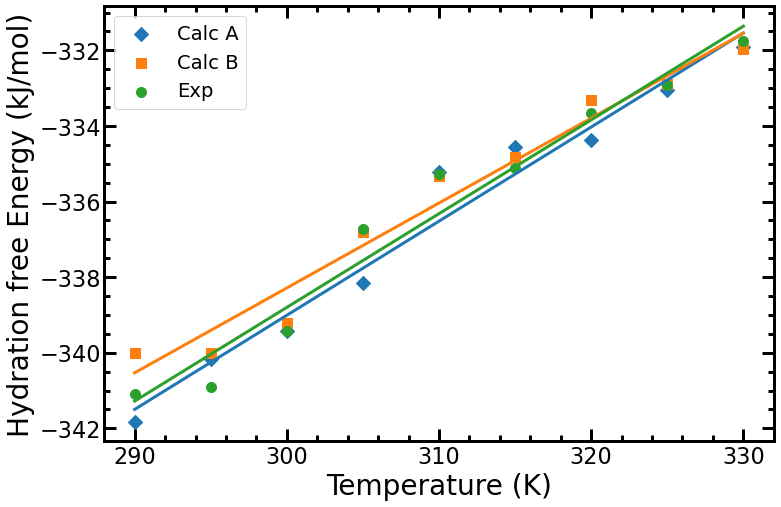

<function print>

In [5]:
plt.rcParams.update(figureParameters)

# Create the figure with the data points and their fit
fig = plt.figure()
ax = fig.gca()

prettyTicks(ax,10,2)
ax.set(xlabel="Temperature (K)")
ax.set(ylabel="Hydration free Energy (kJ/mol)")
       
marks = ['D','s','o']
for i in range(0,numberOfDataSets):
    ax.scatter(data["T"], data[nameOdDataSet[i]]  , label=nameOdDataSet[i] ,s=100, marker=marks[i])

    y = line(data["T"], results[i].best_values["m"], results[i].best_values["q"])
    ax.plot(data["T"], y, label="", lw=3)

# Make the figure
ax.legend(loc="upper left")
plt.show()
print

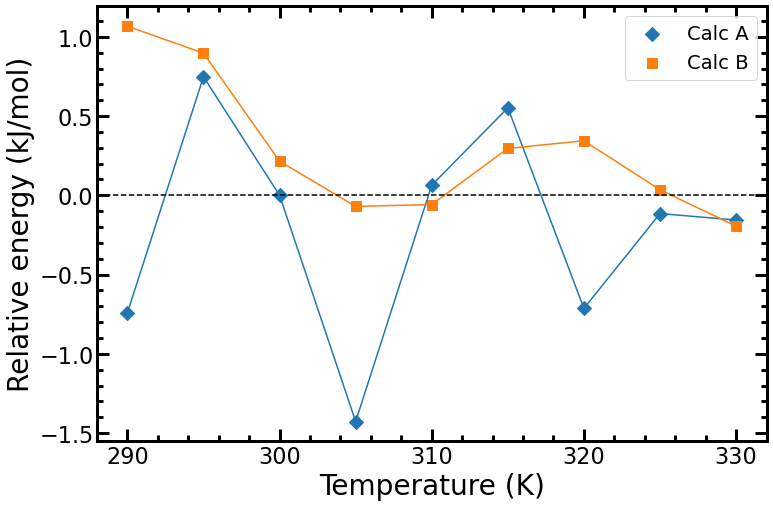

In [7]:
fig = plt.figure()
ax = fig.gca()
prettyTicks(ax,10,0.5)

ax.set(xlabel="Temperature (K)")
ax.set(ylabel="Relative energy (kJ/mol)")
       
for i in range(0,numberOfDataSets-1):
    ax.scatter(data["T"], data[nameOdDataSet[i]]-data["Exp"], label=nameOdDataSet[i], s=100, marker=marks[i])
    ax.plot(data["T"], data[nameOdDataSet[i]]-data["Exp"], label="")
    
ax.axhline(y=0, linestyle="dashed", color='black')

ax.legend()
plt.show()

### Let's now make a quantitative comparison between the datasets

In [ ]:
maeA = np.mean( np.absolute(data["A"]-data["Exp"]) )
maeB = np.mean( np.absolute(data["B"]-data["Exp"]) )
print("Mean absolute error for Calc A : %5.3f" % maeA )
print("Mean absolute error for Calc B : %5.3f" % maeB )